In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
cost_ep=pd.read_csv("wandb_export_2021-10-08T08_23_47.381-06_00.csv")

# Data preproc

In [93]:
cost_ep=cost_ep.rename(columns={
    "nn_mask_plus_consumption_lm_20cust_5dc - _step":"step",
    "nn_mask_plus_consumption_lm_20cust_5dc - average_cost_ep":"average_cost_ep",
    "nn_mask_plus_consumption_lm_20cust_5dc - big_m_count":"big_m_count",
})
cost_ep = cost_ep[["episodes","step","average_cost_ep","big_m_count"]]
cost_ep.head()

,episodes,step,average_cost_ep,big_m_count
0,10,152,1.592729e+08,11
1,15,305,7.419687e+07,9
2,20,458,1.081533e+08,15
3,25,611,1.194832e+08,12
4,30,764,1.787826e+08,16


<AxesSubplot:xlabel='episodes', ylabel='value'>

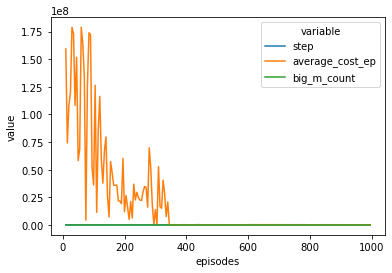

In [97]:
# Long format
sns.lineplot(data=pd.melt(cost_ep,['episodes']),x='episodes',y='value',hue='variable')

<AxesSubplot:xlabel='episodes', ylabel='nn_mask_plus_consumption_lm_20cust_5dc - average_cost_ep'>

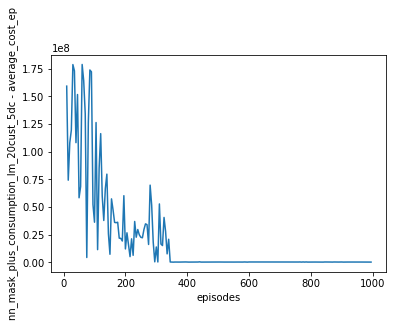

In [30]:
sns.lineplot(x=cost_ep.episodes,y=cost_epcost_ep["nn_mask_plus_consumption_lm_20cust_5dc - average_cost_ep"])

<AxesSubplot:xlabel='episodes', ylabel='nn_mask_plus_consumption_lm_20cust_5dc - big_m_count'>

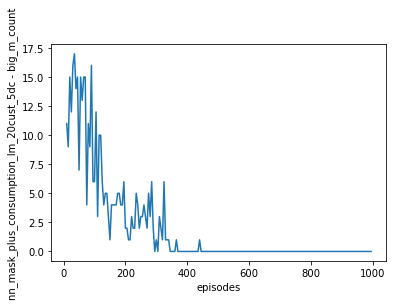

In [37]:
sns.lineplot(x=cost_ep.episodes,y=cost_ep["nn_mask_plus_consumption_lm_20cust_5dc - big_m_count"])

<AxesSubplot:xlabel='episodes'>

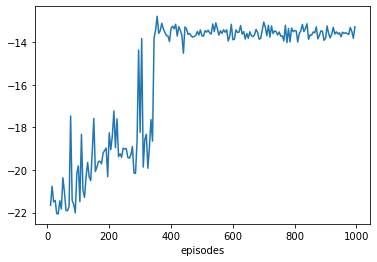

In [100]:
def llp_reward(cost,bigm,eps_b=5):
    return -np.log(cost)-np.log(bigm+eps_b)
bigm=cost_ep["big_m_count"]
cost=cost_ep["average_cost_ep"]
sns.lineplot(x=cost_ep.episodes,y=llp_reward(cost,bigm))

/usr/local/Caskroom/miniconda/base/envs/ts_mcfrl/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/ts_mcfrl/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='episodes', ylabel='nn_mask_plus_consumption_lm_20cust_5dc - big_m_count'>

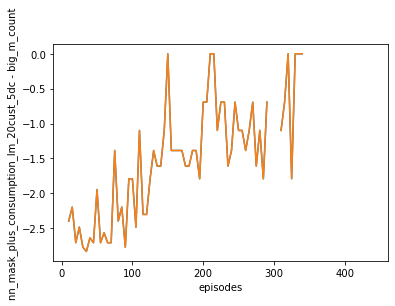

In [59]:
def minuslogeps(x,eps):
    return -np.log(x+eps)
fig=plt.figure()
sns.lineplot(x=cost_ep.episodes,y=minuslogeps(bigm,0))
sns.lineplot(x=cost_ep.episodes,y=minuslogeps(bigm,0))

In [67]:
-np.log(0+0.000000000000000000000000000001)

69.07755278982137

Idea: what's the lowest cost possible without bigM

In [74]:
cost_ep[cost_ep["nn_mask_plus_consumption_lm_20cust_5dc - big_m_count"]==0]['nn_mask_plus_consumption_lm_20cust_5dc - average_cost_ep'].describe()

count       131.000000
mean     157057.443766
std       38022.983024
min       70652.666667
25%      133704.533333
50%      153115.433333
75%      176878.516667
max      346037.833333
Name: nn_mask_plus_consumption_lm_20cust_5dc - average_cost_ep, dtype: float64